In [ ]:
from huggingface_hub import login

In [ ]:
try:
    login()
except Exception as e:
    print(f"Could not log in to Hugging Face Hub: {e}")
    print("Please ensure you have a valid token and try again.")

In [ ]:
# Install compatible versions of transformers and torch
!pip install --upgrade transformers torch

In [ ]:
!pip install ctransformers

from ctransformers import AutoModelForCausalLM

model = AutoModelForCausalLM.from_pretrained(
    "TheBloke/Mistral-7B-Instruct-v0.1-GGUF",
    model_file="mistral-7b-instruct-v0.1.Q4_K_M.gguf",  # adjust this to your preferred quantization
    model_type="mistral",
    max_new_tokens=256
)



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 104.8 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/31.0 [00:00<?, ?B/s]

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

mistral-7b-instruct-v0.1.Q4_K_M.gguf:   0%|          | 0.00/4.37G [00:00<?, ?B/s]

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Load the image
image = cv2.imread('/content/download.jpeg', cv2.IMREAD_GRAYSCALE)

# Resize if needed
#image = cv2.resize(image, (256, 256))


In [ ]:
# Horizontal kernel (Sobel X)
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

# Vertical kernel (Sobel Y)
sobel_y = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])


In [ ]:
edge_x = cv2.filter2D(src=image, ddepth=-1, kernel=sobel_x)
edge_y = cv2.filter2D(src=image, ddepth=-1, kernel=sobel_y)

edge_combined = cv2.magnitude(np.float32(edge_x), np.float32(edge_y))


error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/filter.dispatch.cpp:1528: error: (-215:Assertion failed) !_src.empty() in function 'filter2D'


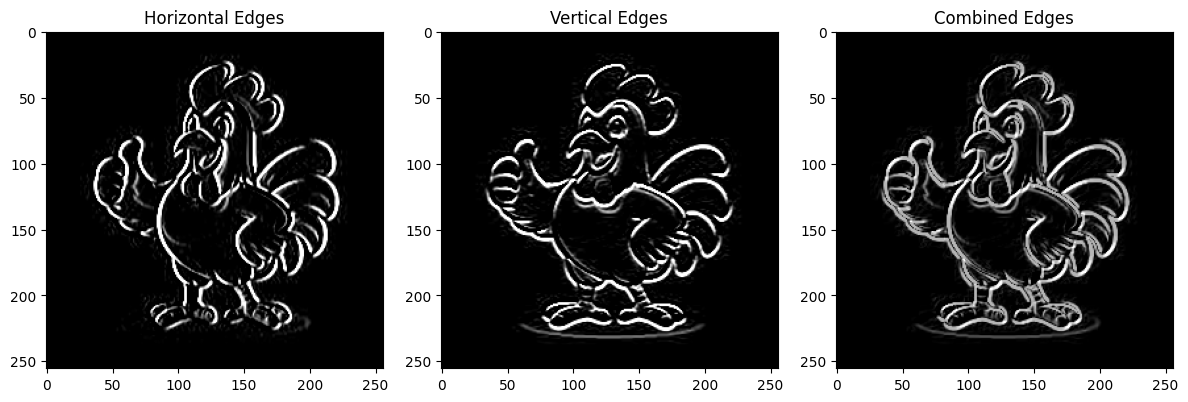

In [ ]:
edge_combined = cv2.normalize(edge_combined, None, 0, 255, cv2.NORM_MINMAX)
edge_combined = np.uint8(edge_combined)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title('Horizontal Edges')
plt.imshow(edge_x, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Vertical Edges')
plt.imshow(edge_y, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Combined Edges')
plt.imshow(edge_combined, cmap='gray')

plt.tight_layout()
plt.show()


In [ ]:
scharr_x = np.array([
    [-3,  0,  3],
    [-10, 0, 10],
    [-3,  0,  3]
], dtype=np.float32)

scharr_y = np.array([
    [-3, -10, -3],
    [ 0,   0,  0],
    [ 3,  10,  3]
], dtype=np.float32)


In [ ]:
edge_x_schar = cv2.filter2D(src=image, ddepth=-1, kernel=scharr_x)
edge_y_schar = cv2.filter2D(src=image, ddepth=-1, kernel=scharr_y)

edge_combined_schar = cv2.magnitude(np.float32(edge_x_schar), np.float32(edge_y_schar))

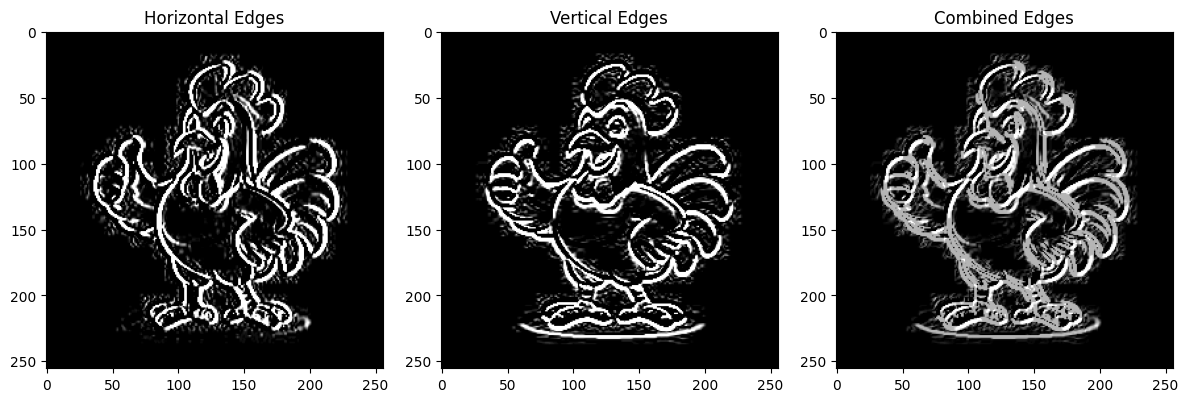

In [ ]:
edge_combined_schar = cv2.normalize(edge_combined_schar, None, 0, 255, cv2.NORM_MINMAX)
edge_combined_schar = np.uint8(edge_combined_schar)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title('Horizontal Edges')
plt.imshow(edge_x_schar, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Vertical Edges')
plt.imshow(edge_y_schar, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Combined Edges')
plt.imshow(edge_combined_schar, cmap='gray')

plt.tight_layout()
plt.show()


In [ ]:
feldman_x = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
], dtype=np.float32)

feldman_y = np.array([
    [-1, -1, -1],
    [ 0,  0,  0],
    [ 1,  1,  1]
], dtype=np.float32)


In [ ]:
edge_x_feld = cv2.filter2D(src=image, ddepth=-1, kernel=feldman_x)
edge_y_feld = cv2.filter2D(src=image, ddepth=-1, kernel=feldman_y)

edge_combined_feld = cv2.magnitude(np.float32(edge_x_feld), np.float32(edge_y_feld))

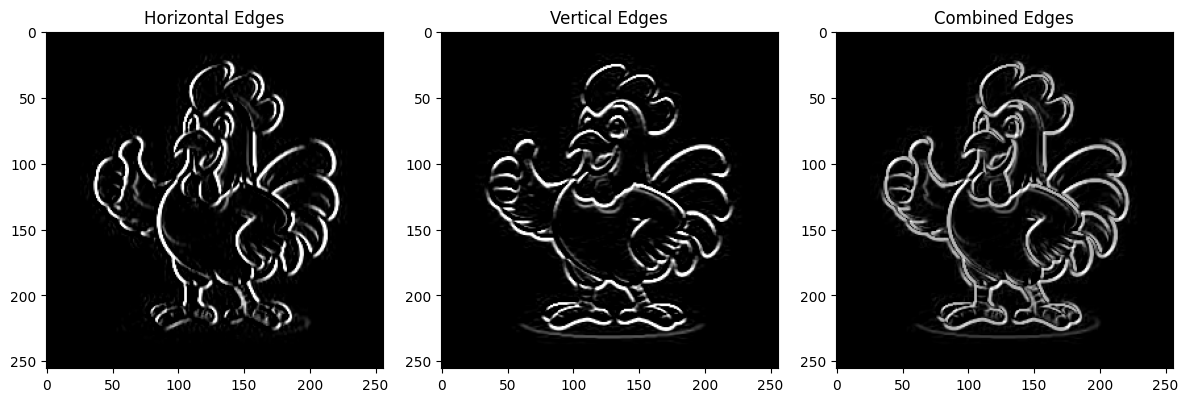

In [ ]:
edge_combined_feld = cv2.normalize(edge_combined_feld, None, 0, 255, cv2.NORM_MINMAX)
edge_combined_feld = np.uint8(edge_combined_feld)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title('Horizontal Edges')
plt.imshow(edge_x_feld, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Vertical Edges')
plt.imshow(edge_y_feld, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Combined Edges')
plt.imshow(edge_combined_feld, cmap='gray')

plt.tight_layout()
plt.show()


In [ ]:
image = cv2.imread('/content/download.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

gray = cv2.resize(gray, (256, 256))


In [ ]:
def convolve(image, kernel):
    h, w = image.shape
    kh, kw = kernel.shape
    pad = kh // 2

    padded_img = np.pad(image, pad, mode='constant', constant_values=0)
    output = np.zeros_like(image, dtype=np.float32)

    for i in range(h):
        for j in range(w):
            region = padded_img[i:i+kh, j:j+kw]
            output[i, j] = np.sum(region * kernel)

    return output


In [ ]:
scharr_x = np.array([
    [-3,  0,  3],
    [-10, 0, 10],
    [-3,  0,  3]
], dtype=np.float32)

scharr_y = np.array([
    [-3, -10, -3],
    [ 0,   0,  0],
    [ 3,  10,  3]
], dtype=np.float32)


In [ ]:
feldman_x = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
], dtype=np.float32)

feldman_y = np.array([
    [-1, -1, -1],
    [ 0,  0,  0],
    [ 1,  1,  1]
], dtype=np.float32)


In [ ]:
scharr_x_img = convolve(gray, scharr_x)
scharr_y_img = convolve(gray, scharr_y)
scharr_edge = np.sqrt(scharr_x_img**2 + scharr_y_img**2)

feldman_x_img = convolve(gray, feldman_x)
feldman_y_img = convolve(gray, feldman_y)
feldman_edge = np.sqrt(feldman_x_img**2 + feldman_y_img**2)


In [ ]:
def normalize(img):
    img = (img - np.min(img)) / (np.max(img) - np.min(img)) * 255
    return img.astype(np.uint8)

scharr_edge_norm = normalize(scharr_edge)
feldman_edge_norm = normalize(feldman_edge)


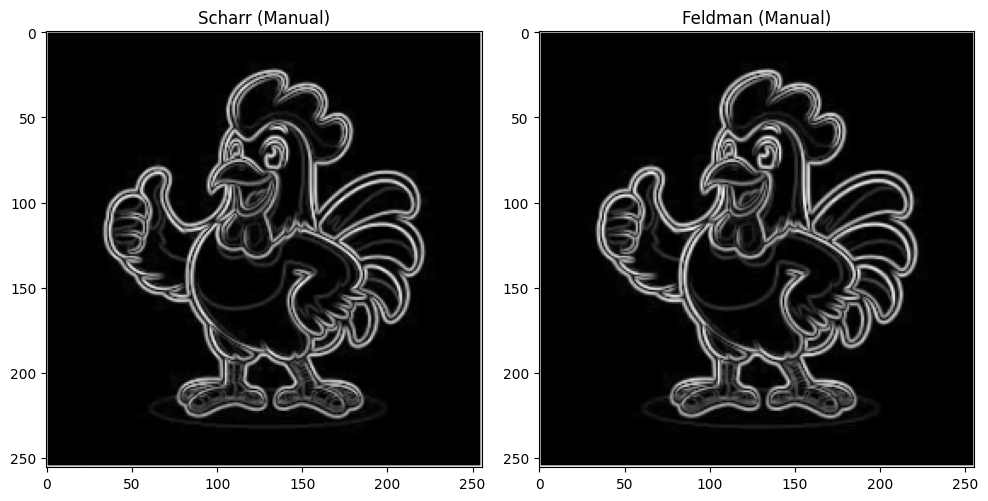

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Scharr (Manual)')
plt.imshow(scharr_edge_norm, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Feldman (Manual)')
plt.imshow(feldman_edge_norm, cmap='gray')

plt.tight_layout()
plt.show()



In [ ]:
def gaussian_kernel(ksize=5, sigma=1.0):
    """Returns a (ksize x ksize) Gaussian kernel."""
    ax = np.linspace(-(ksize//2), ksize//2, ksize)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    return kernel / np.sum(kernel)

# Example: 5×5, σ=1
gk = gaussian_kernel(5, 1.0)
smoothed = convolve(gray, gk)


In [ ]:
# Define Scharr from before
scharr_x = np.array([[-3,0,3],[-10,0,10],[-3,0,3]], dtype=np.float32)
scharr_y = np.array([[-3,-10,-3],[0,0,0],[3,10,3]], dtype=np.float32)

gx = convolve(smoothed, scharr_x)
gy = convolve(smoothed, scharr_y)

magnitude = np.hypot(gx, gy)
angle = (np.arctan2(gy, gx) * (180.0 / np.pi)) % 180


In [ ]:
def non_max_suppression(mag, ang):
    H, W = mag.shape
    Z = np.zeros((H,W), dtype=np.float32)
    for i in range(1, H-1):
        for j in range(1, W-1):
            q = 255; r = 255
            # 0°
            if (0 <= ang[i,j] < 22.5) or (157.5 <= ang[i,j] <= 180):
                q = mag[i, j+1]; r = mag[i, j-1]
            # 45°
            elif 22.5 <= ang[i,j] < 67.5:
                q = mag[i+1, j-1]; r = mag[i-1, j+1]
            # 90°
            elif 67.5 <= ang[i,j] < 112.5:
                q = mag[i+1, j]; r = mag[i-1, j]
            # 135°
            elif 112.5 <= ang[i,j] < 157.5:
                q = mag[i-1, j-1]; r = mag[i+1, j+1]

            if mag[i,j] >= q and mag[i,j] >= r:
                Z[i,j] = mag[i,j]
    return Z

nms = non_max_suppression(magnitude, angle)


In [ ]:
def double_threshold(img, low_ratio=0.05, high_ratio=0.15):
    high = img.max() * high_ratio
    low  = high * low_ratio
    res = np.zeros_like(img, dtype=np.uint8)
    strong = 255; weak = 75

    strong_i, strong_j = np.where(img >= high)
    weak_i,   weak_j   = np.where((img <= high) & (img >= low))

    res[strong_i, strong_j] = strong
    res[weak_i,   weak_j]   = weak
    return res, weak, strong

dt, weak, strong = double_threshold(nms)


In [ ]:
def hysteresis(img, weak, strong=255):
    H, W = img.shape
    for i in range(1, H-1):
        for j in range(1, W-1):
            if img[i,j] == weak:
                if np.any(img[i-1:i+2, j-1:j+2] == strong):
                    img[i,j] = strong
                else:
                    img[i,j] = 0
    return img

edges = hysteresis(dt, weak, strong)


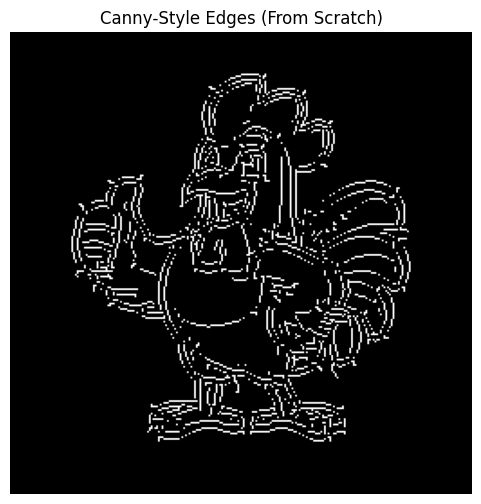

In [ ]:
plt.figure(figsize=(6,6))
plt.title('Canny‑Style Edges (From Scratch)')
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()
